<a href="https://colab.research.google.com/github/claredavies/MachineLearningCoursework/blob/main/Assignment1/MachineLearningAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

\# Preprocessing Data for Neural Networks -Reducing Overfitting with Dropout

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#uploading and reading RESTler output file with test cases
from google.colab import files
uploaded = files.upload()
dataset = pd.read_csv('bank-additional-full.csv', sep=';', delimiter=None, header='infer', names=None, index_col=None)

Saving bank-additional-full.csv to bank-additional-full.csv


In [3]:
sns.set_style('dark')
import matplotlib as mpl
mpl.style.use(['https://gist.githubusercontent.com/BrendanMartin/01e71bb9550774e2ccff3af7574c0020/raw/6fa9681c7d0232d34c9271de9be150e584e606fe/lds_default.mplstyle'])
mpl.rcParams.update({"figure.figsize": (8,6), "axes.titlepad": 22.0})

In [4]:
dataset.rename(columns = {'y':'target'}, inplace = True)

print('Target variables  : ', dataset['target'])
(unique, counts) = np.unique(dataset['target'], return_counts=True)

print('Unique values of the target variable', unique)
print('Counts of the target variable :', counts)

Target variables  :  0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: target, Length: 41188, dtype: object
Unique values of the target variable ['no' 'yes']
Counts of the target variable : [36548  4640]


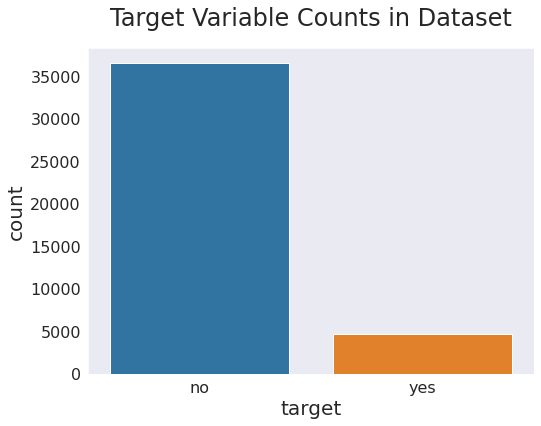

In [5]:
sns.countplot(data = dataset,x = 'target')
plt.title('Target Variable Counts in Dataset')
plt.show()

Filter Variables

In [6]:
dataset['target'] = pd.factorize(dataset['target'])[0] + 1
dataset['job'] = pd.factorize(dataset['job'])[0] + 1
dataset['marital'] = pd.factorize(dataset['marital'])[0] + 1
dataset['education'] = pd.factorize(dataset['education'])[0] + 1
dataset['default'] = pd.factorize(dataset['default'])[0] + 1
dataset['housing'] = pd.factorize(dataset['housing'])[0] + 1
dataset['default'] = pd.factorize(dataset['default'])[0] + 1
dataset['loan'] = pd.factorize(dataset['loan'])[0] + 1
dataset['contact'] = pd.factorize(dataset['contact'])[0] + 1
dataset['month'] = pd.factorize(dataset['month'])[0] + 1
dataset['day_of_week'] = pd.factorize(dataset['day_of_week'])[0] + 1
dataset['poutcome'] = pd.factorize(dataset['contact'])[0] + 1

# Should remove - duration as only for benchmark
dataset = dataset.drop('duration', 1)

Handling Imbalance

Unique values of the target variable [1 2]
Counts of the target variable : [4640 4640]


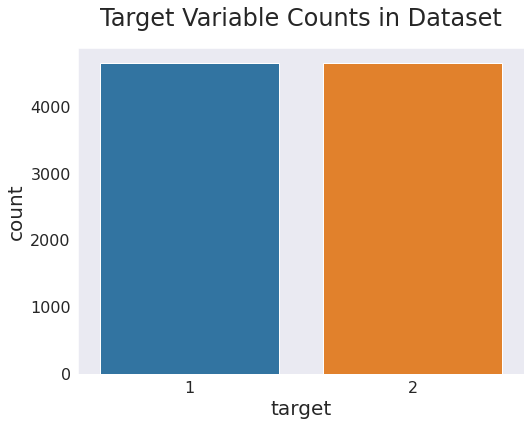

In [7]:
yes = dataset[dataset.target == 2]
no = dataset[dataset.target == 1]

no = no.sample(n=len(yes), random_state=101,replace=True)
dataset = pd.concat([yes,no],axis=0)

(unique, counts) = np.unique(dataset['target'], return_counts=True)

print('Unique values of the target variable', unique)
print('Counts of the target variable :', counts)

sns.countplot(data = dataset,x = 'target')
plt.title('Target Variable Counts in Dataset')
plt.show()

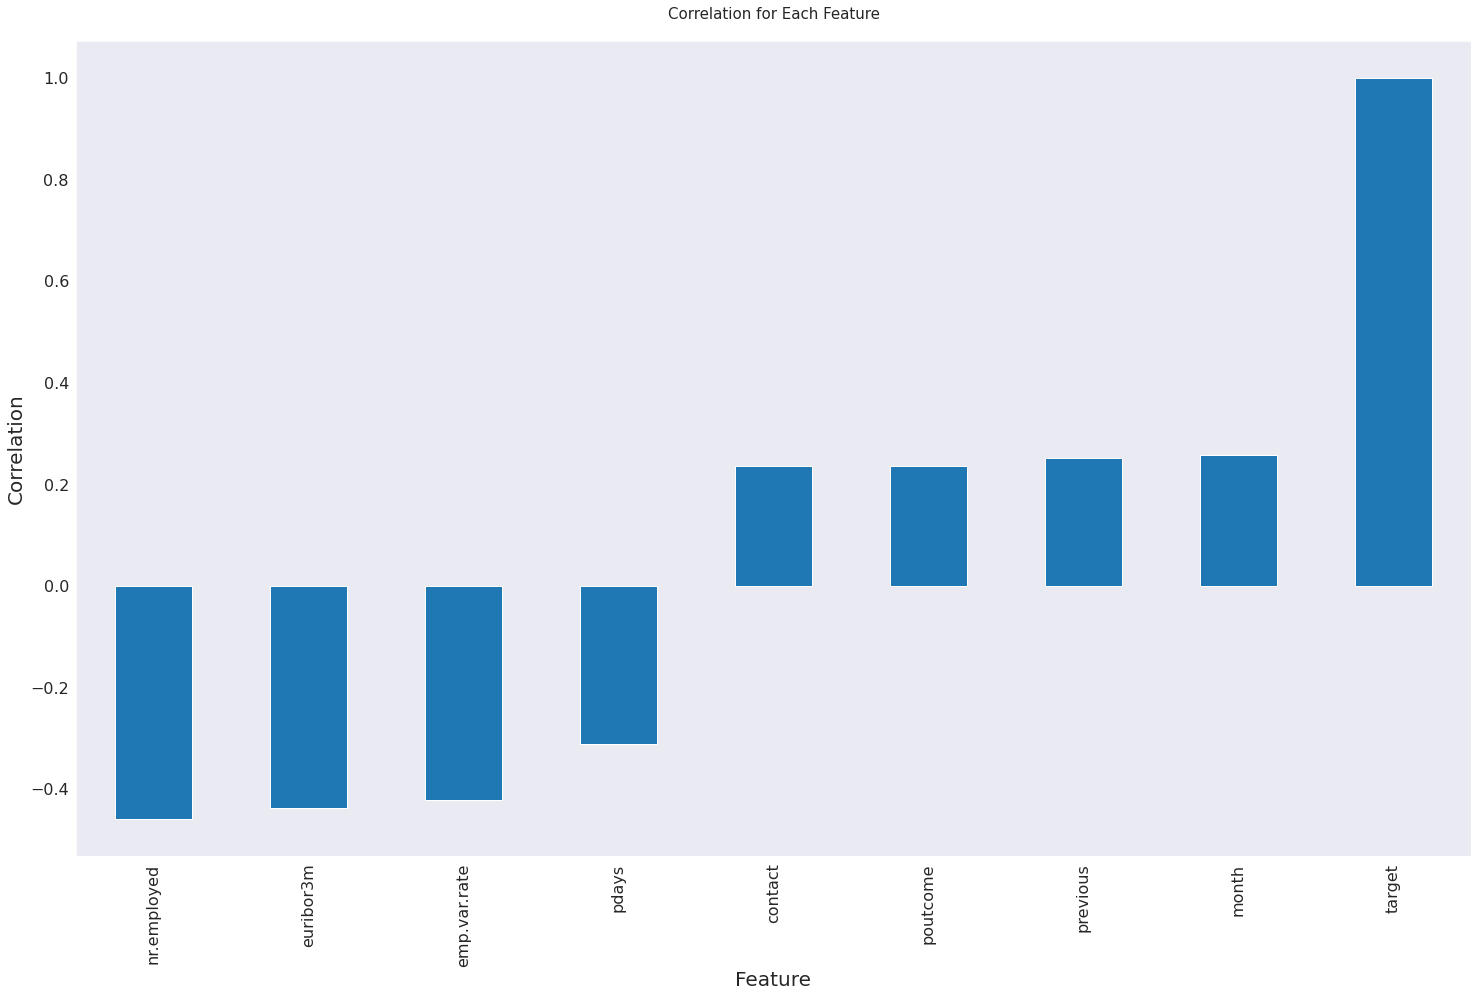

       contact  month  pdays  ...  emp.var.rate  euribor3m  nr.employed
75           1      1    999  ...           1.1      4.857       5191.0
83           1      1    999  ...           1.1      4.857       5191.0
88           1      1    999  ...           1.1      4.857       5191.0
129          1      1    999  ...           1.1      4.857       5191.0
139          1      1    999  ...           1.1      4.857       5191.0
...        ...    ...    ...  ...           ...        ...          ...
11366        1      2    999  ...           1.4      4.959       5228.1
9346         1      2    999  ...           1.4      4.967       5228.1
29718        2      9    999  ...          -1.8      1.405       5099.1
16664        1      3    999  ...           1.4      4.963       5228.1
40815        2     10    999  ...          -1.1      0.879       4963.6

[9280 rows x 8 columns]


In [20]:
std_features_keep = dataset

# Create correlation matrix
corr_matrix = std_features_keep.corr()['target'].sort_values()
threshold = 0.2

for  i, v in corr_matrix.iteritems():
    if(abs(v) < threshold):
      std_features_keep = std_features_keep.drop(i, axis=1)

# Plot for correlation
SMALL_SIZE = 15
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
std_plot = (std_features_keep.corr()['target'].sort_values()).plot(kind="bar",figsize=(25,15))
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.title('Correlation for Each Feature')
plt.show()

std_features_keep = std_features_keep.drop(['target'], axis=1)
print(std_features_keep)

In [21]:
x = std_features_keep   #Feature Matrix
y = dataset["target"]          #Target Variable

print(x.head())
print(y.head())

     contact  month  pdays  ...  emp.var.rate  euribor3m  nr.employed
75         1      1    999  ...           1.1      4.857       5191.0
83         1      1    999  ...           1.1      4.857       5191.0
88         1      1    999  ...           1.1      4.857       5191.0
129        1      1    999  ...           1.1      4.857       5191.0
139        1      1    999  ...           1.1      4.857       5191.0

[5 rows x 8 columns]
75     2
83     2
88     2
129    2
139    2
Name: target, dtype: int64


Step 1: Define explonatory variables and target variable

In [22]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
x = standardizer.fit_transform(x)

Split the dataset into training and testing sets

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.25, random_state=0)

Fit a Logistic Regression Model to the train data

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

Make predictions on the testing data

In [27]:
predictions = model.predict(x_test)

Calculate the accuracy score by comparing the actual values and predicted values.

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  805
False Positive(FP) =  274
True Negative(TN)  =  865
False Negative(FN) =  376
Accuracy of the binary classification = 0.720


Perfomance evaluation of each binary classifier

In [29]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(x_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(x_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [31]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.719828,0.759438,0.697019
Support Vector Machines,0.720690,0.757682,0.698785
Decision Trees,0.725431,0.851624,0.674548
Random Forest,0.732759,0.835821,0.687365
Naive Bayes,0.702586,0.717296,0.689451
K-Nearest Neighbor,0.716810,0.809482,0.676946


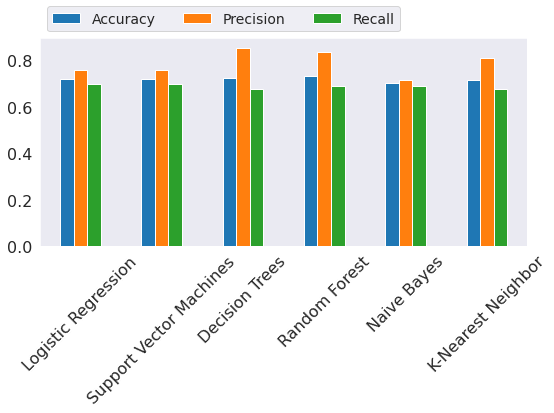

In [32]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()